<a href="https://colab.research.google.com/github/varnikanalla/vptv/blob/main/no_of_objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


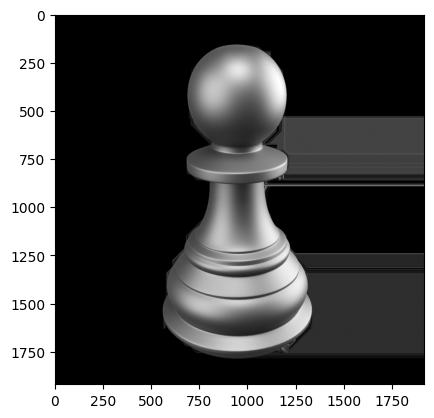

In [ ]:
image = cv2.imread('chess.webp')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')


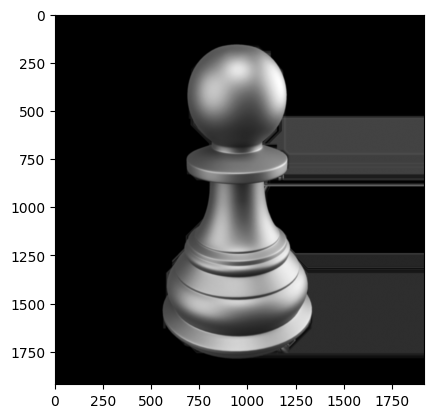

In [ ]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap='gray')


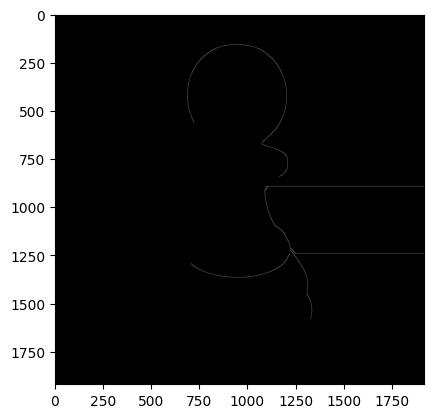

In [ ]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')


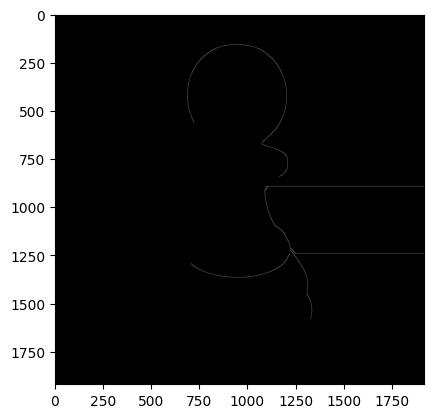

In [ ]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)
plt.imshow(dilated, cmap='gray')


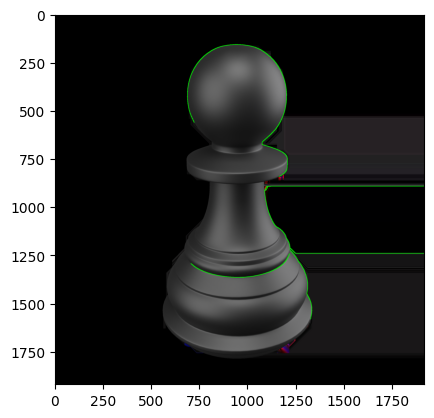

In [ ]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

plt.imshow(rgb)


In [ ]:
print("no of objects: ", len(cnt))


no of objects:  3
